In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
%matplotlib inline

In [3]:
my_path = r'C:\Users\nkasb\Desktop\Data analyst programm\Task 6\Project Task_6'

In [4]:
df = pd.read_csv(os.path.join(my_path, '2. Data', 'Data prepared', 'df_merged.csv'))

In [5]:
df.head()

Unnamed: 0  Year      Country  Happiness rank  Happiness score  \
0           0  2015  Switzerland             1.0            7.587   
1           1  2015      Iceland             2.0            7.561   
2           2  2015      Denmark             3.0            7.527   
3           3  2015       Norway             4.0            7.522   
4           4  2015       Canada             5.0            7.427   

   GDP per capita  Social support  Healthy life expectancy  Freedom  \
0         1.39651         1.34951                  0.94143  0.66557   
1         1.30232         1.40223                  0.94784  0.62877   
2         1.32548         1.36058                  0.87464  0.64938   
3         1.45900         1.33095                  0.88521  0.66973   
4         1.32629         1.32261                  0.90563  0.63297   

   Perception of corruption  Generosity  
0                   0.41978     0.29678  
1                   0.14145     0.43630  
2                   0.48357     0.34139  
3                   0.36503     0.34699  
4                   0.32957     0.45811

In [6]:
df.shape

(782, 11)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Happiness rank', 'Happiness score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Perception of corruption', 'Generosity'],
      dtype='object')

In [9]:
df.describe()

Unnamed: 0         Year  Happiness rank  Happiness score  \
count  782.000000   782.000000      779.000000       782.000000   
mean   390.500000  2016.993606       78.400513         5.379018   
std    225.888247     1.417364       45.004442         1.127456   
min      0.000000  2015.000000        1.000000         2.693000   
25%    195.250000  2016.000000       39.500000         4.509750   
50%    390.500000  2017.000000       78.000000         5.322000   
75%    585.750000  2018.000000      117.000000         6.189500   
max    781.000000  2019.000000      156.000000         7.769000   

       GDP per capita  Social support  Healthy life expectancy     Freedom  \
count      782.000000      782.000000               782.000000  782.000000   
mean         0.916047        1.078392                 0.612416    0.411091   
std          0.407340        0.329548                 0.248309    0.152880   
min          0.000000        0.000000                 0.000000    0.000000   
25%          0.606500        0.869363                 0.440183    0.309768   
50%          0.982205        1.124735                 0.647310    0.431000   
75%          1.236187        1.327250                 0.808000    0.531000   
max          2.096000        1.644000                 1.141000    0.724000   

       Perception of corruption  Generosity  
count                781.000000  782.000000  
mean                   0.125436    0.218576  
std                    0.105816    0.122321  
min                    0.000000    0.000000  
25%                    0.054000    0.130000  
50%                    0.091000    0.201982  
75%                    0.156030    0.278832  
max                    0.551910    0.838075

In [10]:
df = df.drop(columns =['Unnamed: 0', 'Country'])

In [11]:
df.head()

Year  Happiness rank  Happiness score  GDP per capita  Social support  \
0  2015             1.0            7.587         1.39651         1.34951   
1  2015             2.0            7.561         1.30232         1.40223   
2  2015             3.0            7.527         1.32548         1.36058   
3  2015             4.0            7.522         1.45900         1.33095   
4  2015             5.0            7.427         1.32629         1.32261   

   Healthy life expectancy  Freedom  Perception of corruption  Generosity  
0                  0.94143  0.66557                   0.41978     0.29678  
1                  0.94784  0.62877                   0.14145     0.43630  
2                  0.87464  0.64938                   0.48357     0.34139  
3                  0.88521  0.66973                   0.36503     0.34699  
4                  0.90563  0.63297                   0.32957     0.45811

In [12]:
dups = df.duplicated()
dups.sum()

0

In [13]:
df.isnull().sum()

Year                        0
Happiness rank              3
Happiness score             0
GDP per capita              0
Social support              0
Healthy life expectancy     0
Freedom                     0
Perception of corruption    1
Generosity                  0
dtype: int64

In [14]:
df['Perception of corruption'].fillna(0.312, inplace = True)

In [15]:
df['Perception of corruption'].isnull().sum()

0

In [16]:
df['Happiness rank'].fillna(152, inplace = True)

In [17]:
df.isnull().sum()

Year                        0
Happiness rank              0
Happiness score             0
GDP per capita              0
Social support              0
Healthy life expectancy     0
Freedom                     0
Perception of corruption    0
Generosity                  0
dtype: int64

In [18]:
df1 = df[['Year', 'Healthy life expectancy']]

In [19]:
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df1)

In [20]:
quandl.ApiConfig.api_key = '9Gk6sxkbFADH4ijETPk_'

In [21]:
data = quandl.get('RATEINF/CPI_EUR')

In [22]:
data.head()

Value
Date             
1990-01-31  69.46
1990-02-28  69.71
1990-03-31  69.88
1990-04-30  70.14
1990-05-31  70.30

In [23]:
data.columns

Index(['Value'], dtype='object')

In [24]:
type(data)

pandas.core.frame.DataFrame

In [25]:
data.isnull().sum()

Value    0
dtype: int64

In [26]:
dups = data.duplicated()
dups.sum()

33

In [27]:
df = data.drop_duplicates()

In [28]:
dups1 = df.duplicated()
dups1.sum()

0

In [29]:
df.shape

(369, 1)

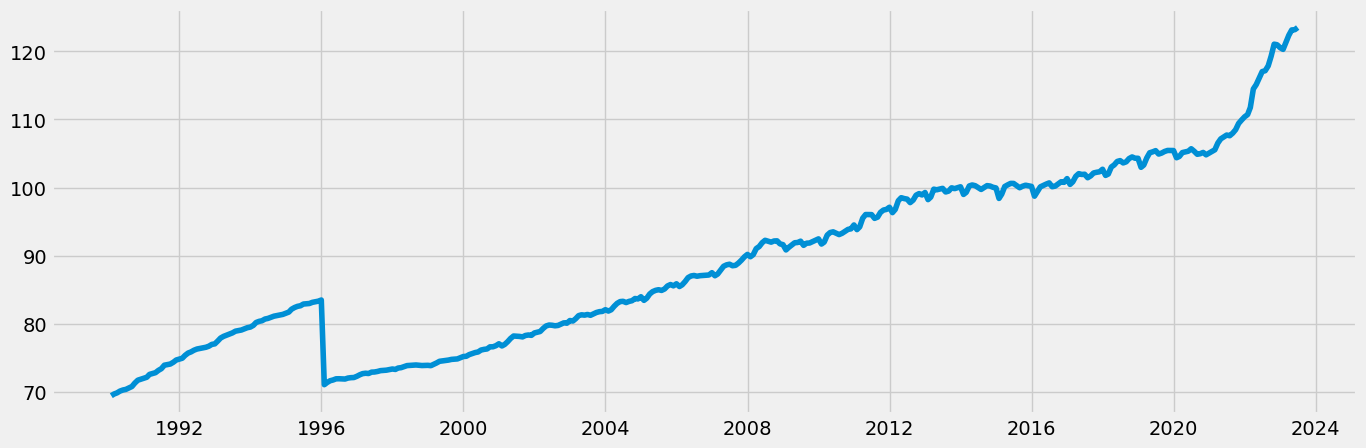

In [30]:

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(df)

In [31]:
data_2 = df.reset_index()

In [32]:
data_2.head()

Date  Value
0 1990-01-31  69.46
1 1990-02-28  69.71
2 1990-03-31  69.88
3 1990-04-30  70.14
4 1990-05-31  70.30

In [33]:
data_sub = data_2.loc[(data_2['Date'] >= '2015-01-01') & (data_2['Date'] < '2020-06-01')]

In [34]:
data_sub.head()

Date   Value
276 2015-01-31   98.40
277 2015-02-28   99.03
278 2015-03-31  100.15
279 2015-04-30  100.39
280 2015-05-31  100.61

In [35]:
data_sub.shape

(58, 2)

In [36]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) 
data_sub = data_sub.set_index('datetime') 
data_sub.drop(['Date'], axis=1, inplace=True) 
data_sub.head()

Value
datetime          
2015-01-31   98.40
2015-02-28   99.03
2015-03-31  100.15
2015-04-30  100.39
2015-05-31  100.61

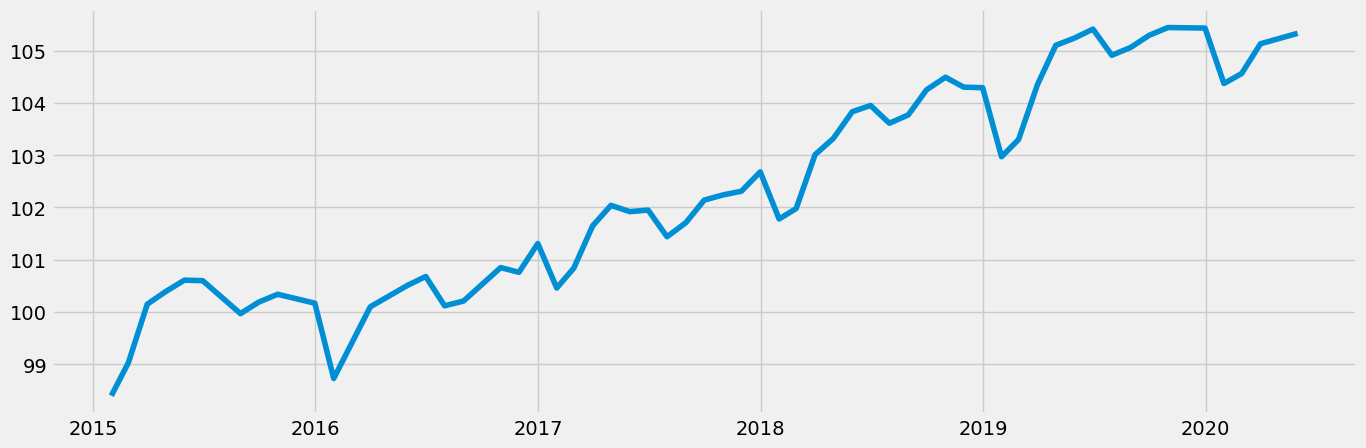

In [37]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [38]:
data_sub.isnull().sum() 

Value    0
dtype: int64

In [39]:
dups = data_sub.duplicated()
dups.sum()

0

In [42]:
data_sub.head()

Value
datetime          
2015-01-31   98.40
2015-02-28   99.03
2015-03-31  100.15
2015-04-30  100.39
2015-05-31  100.61

In [43]:
data_sub.describe()

Value
count   58.000000
mean   102.396034
std      2.017468
min     98.400000
25%    100.602500
50%    102.090000
75%    104.297500
max    105.440000

In [45]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period = 3)

In [46]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

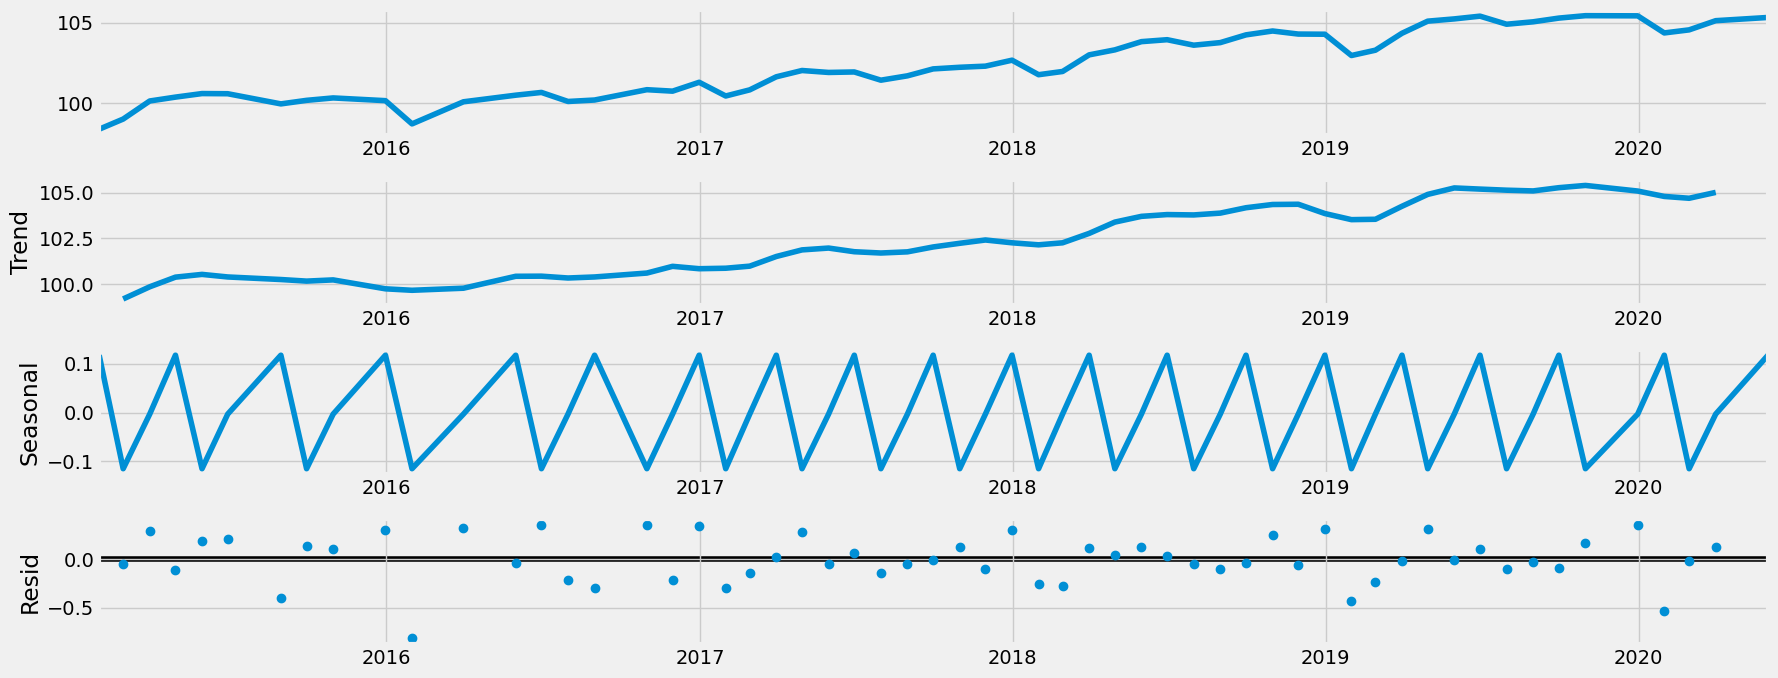

In [47]:
decomposition.plot()
plt.show()

In [48]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.354615
p-value                         0.917405
Number of Lags Used             4.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


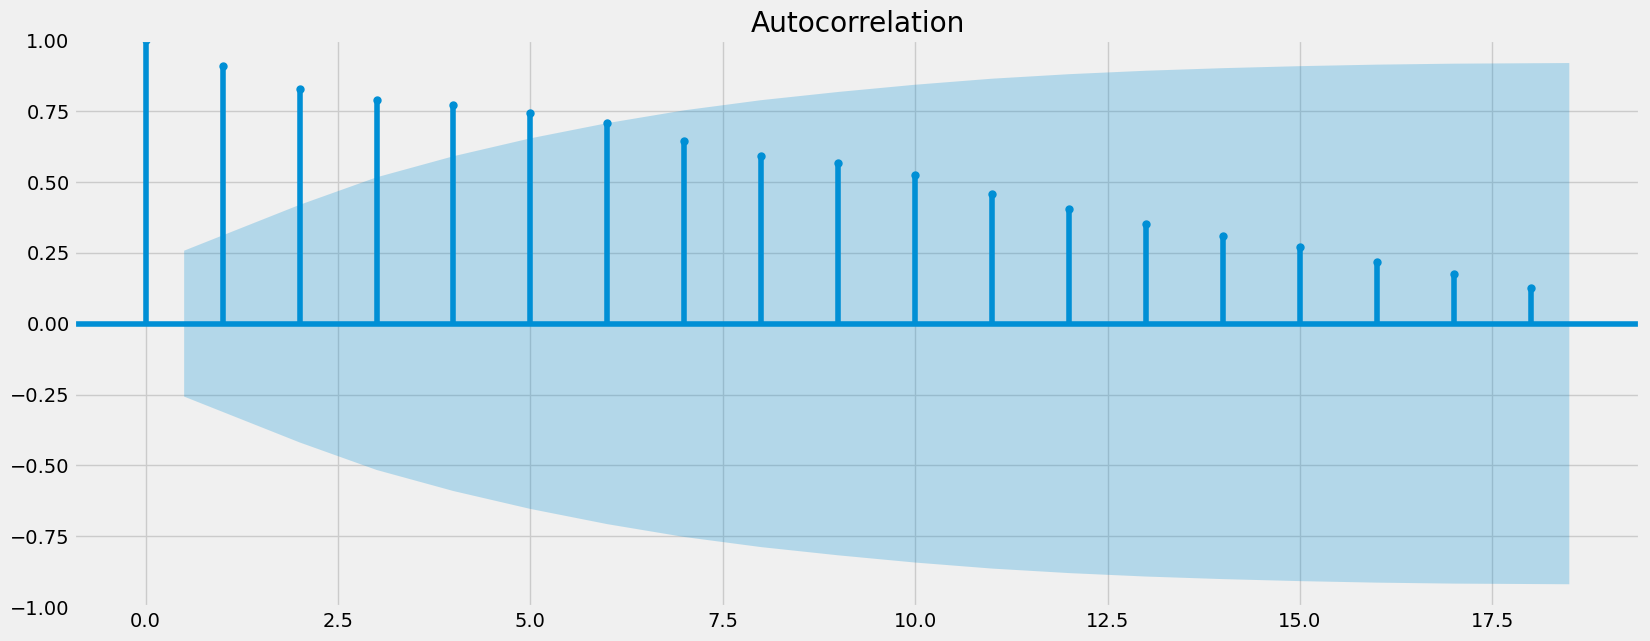

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

In [50]:
data_diff = data_sub - data_sub.shift(1)

In [51]:
data_diff.dropna(inplace = True)

In [52]:
data_diff.head()

Value
datetime         
2015-02-28   0.63
2015-03-31   1.12
2015-04-30   0.24
2015-05-31   0.22
2015-06-30  -0.01

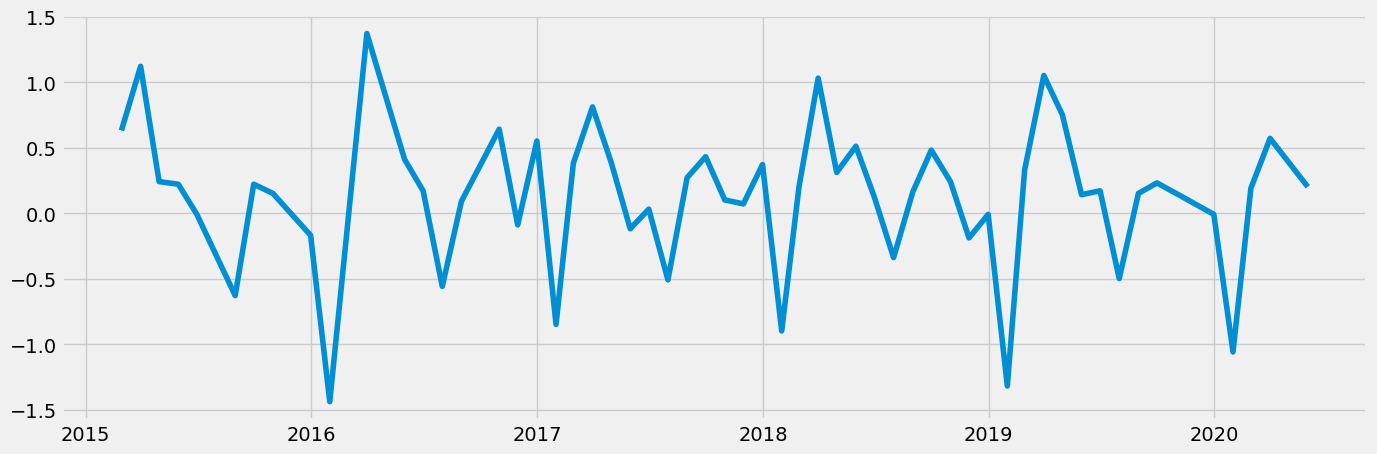

In [53]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [54]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.908005e+00
p-value                        2.680015e-07
Number of Lags Used            3.000000e+00
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


In [56]:
plot_acf(data_diff)
plt.show()